# Homework 6: Hypothesis Testing

Please complete this notebook by filling in the cells provided. When you’re done, follow the instructions in [this short explainer video](https://www.youtube.com/watch?v=gMt_Rq43y_4&ab_channel=FahadKamran) to submit your homework.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due Thursday, October 13 at 7PM (note the new, later time!). You will receive an early submission bonus point if you turn it in by Wednesday, October 12 at 7PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapter [10](https://www.inferentialthinking.com/chapters/10/testing-hypotheses.html) and section [7.4](https://www.inferentialthinking.com/chapters/07/4/joining-tables-by-columns.html)

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.assignment import load_assignment
tests = load_assignment('hw06.ok')

ModuleNotFoundError: No module named 'client'

## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The customer names heads or tails, and then a dealer flips a coin.  The customer wins 9 dollar from the casino if they guess the right side and loses 10 dollar if they're wrong.

<div class="hide">\pagebreak</div>

#### Question 1
Assuming no one is cheating and the coin is fair, if a customer bets once on heads, what is the chance they win that bet?  Over many bets on heads, what is the average amount of money the customer wins from a single bet?  Does your answer change if they bet on tails instead?

# ================== Ans ====================

The chance to win if the bet was `heads` is **50%**. From a single bet, the average amount of money the customer can win is,
$$
\frac{9 - 10}{2} = -0.5
$$
Thus, on average, the customer loses half a dollar.

No, the answer shouldn't change even if they bet on tails since theoretically, their chance to win is equal to if they bet on heads.
# =========================================

A certain customer plays the game 20 times, betting heads each time, and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning could be something other than the normal chance of winning.

You decide to test this using the outcomes of the 20 games you observed.

<div class="hide">\pagebreak</div>

#### Question 2
Define the null hypothesis and alternative hypothesis for this investigation.

# ================== Ans =================
**Null hypothesis:** The game (or the coin) is fair. `13` wins is something that can be obtained by chance from 20 games

**Alternative hypothesis:** `13` wins is not something that can be obtained by chance from 20 games. Something else must be in effect!

# =======================================

<div class="hide">\pagebreak</div>

#### Question 3
Define a test statistic function named `test_statistic`.  Your function should take as its argument the number of times the customer won.  It should return the value of the test statistic for those data.  You'll have to decide how to define the test statistic.  **Then**, compute the value of your test statistic for the 20 games played by the customer we're investigating.  Call this number `actual_test_statistic`.

In [5]:
# Define the test statistic as whether a customer win more or less than the theoretical / expected chance

def test_statistic(num_wins):
    return abs(10 - num_wins)

actual_test_statistic = test_statistic(13)
actual_test_statistic

3

<div class="hide">\pagebreak</div>

#### Question 4
Write a function called `simulate_under_null`.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the null hypothesis is true.  (That number is random.)

In [6]:
def simulate_under_null():
    game = make_array(1, 0) # '1' represents wins, '0' represents lose
    return sum(np.random.choice(game, 20))

In [8]:
_ = tests.grade('q1_4')

<div class="hide">\pagebreak</div>

#### Question 5
Run your simulation 10,000 times and make a histogram of the test statistics.  (Be sure to pick bins that accurately portray the distribution.)

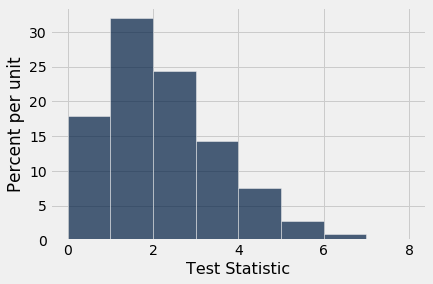

In [19]:
repetitions = 10000
test_stats = []

for i in np.arange(repetitions):
    test_stats.append(test_statistic(simulate_under_null()))
    
    
bins = np.arange(0, 9)
Table().with_column('Test Statistic', test_stats).hist(bins=bins)

<div class="hide">\pagebreak</div>

#### Question 6
Compute a P-value for this test by looking at the histogram.  (Don't write code.  It's okay if your answer is off by a bit.)

Recall the observed wins was `13`, which means the observed test statistic was `3`. In this case, the `p-value` can be calculated as the portion of the test statistics that are `3` or greater.

Total percentage of test statistics that are 3 or greater = 14% + 7 % + 2.5% + 1% = 24.5%
Thus, the `p-value` is 0.245

In [20]:
p_value = 0.245
p_value

0.245

<div class="hide">\pagebreak</div>

#### Question 7
Suppose you use a P-value cutoff of 1%, according to the arbitrary conventions of hypothesis testing.  What do you conclude?

# ========================== Ans =====================
If we use a P-value cutoff of 1%, we can see that the data is consistent with the null hypothesis (`p-value` of 24.5% is significantly greater than 1%) and thus, we fail to reject the null.
# ===================================================

<div class="hide">\pagebreak</div>

#### Question 8
Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

# ======================== Ans ===================
Neither. The `p-value` is the probability under the `null` that the `test statistic` is equal to the observed value or futher to the direction of alternative. However, it doesn't simply relate to the probability of whether a customer cheated or not.
# ==============================================

<div class="hide">\pagebreak</div>

#### Question 9
Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

# ====================== Ans =================
Neither. We only use the cut-off to determine whether we will reject the null hypothesis
# ===========================================

<div class="hide">\pagebreak</div>

#### Question 10
Is either `p_value` or 1% the probability of seeing a test statistic as extreme or more extreme than this one if the null hypothesis were true?

# ====================== Ans =================
Yes, that's the definition of `p-value`
# ===========================================

<div class="hide">\pagebreak</div>

#### Question 11
Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customer were actually cheating, how many would you expect to accuse, on average (if any)?  Explain your answer.

# ====================== Ans =================
The cut-off for the P-value is an error probability. This means despite the `null` hypothesis being true, we still have a 1% chance of rejecting the null hypothesis. If we run 400 different test (400 customers), there's a 1% chance that we will get a wrong conclusion. This means we will have 4 customers that we'll accuse of cheating.
# ===========================================

## 2. Pell Grants by State


The US National Center for Education Statistics compiles information about US colleges and universities in the Integrated Postsecondary Education Data System (IPEDS).  Here's a [spreadsheet](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjMocT62pHOAhUJ1GMKHenBCccQFggeMAA&url=http%3A%2F%2Fnces.ed.gov%2Fipeds%2Ftablefiles%2FtableDocs%2FIPEDS201314Tablesdoc.xlsx&usg=AFQjCNGfg7FWu8NNIQ5ABCDoUH_Yu6Tm0A&sig2=K-z7Bvv2fQSkKSHeYLtkBg) describing the tables in the IPEDS.  The full datasets are available [here](http://nces.ed.gov/ipeds/datacenter/DataFiles.aspx).

In this assignment, we'll use IPEDS data to compute the proportion of college students in each US state who receive Pell grants, which are a kind of financial aid.  The data come from 2013.

The data we need are spread across two IPEDS tables, so we'll have to use `join` to bring them together.

First, run the cell below to load the IPEDS data.  (We've pared down the data to just a few columns for this exercise, but the original datasets are quite rich.)

In [2]:
sfa = Table.read_table("sfa.csv")
hd = Table.read_table("hd.csv")

sfa.show(5)
hd.show(5)

Institution ID,Number of Pell grant recipients,Number of undergraduates
100654,2967,4170
100663,3958,11291
100690,225,329
100706,1930,5882
100724,4240,5130


Institution ID,Name,Address,City,State (abbreviated),ZIP
100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762
100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110
100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553
100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899
100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271


We want to compute the proportion of students in each *state* who receive Pell grants.  Right now we know:

* how many students are at each *school* (the `sfa` table);
* how many students received Pell grants at each school (also the `sfa` table); and
* what state each school is in (the `hd` table).

Let's work backward.  If we know the total number of students in each state and the total number of Pell grant recipients in each state, we can compute the proportions.  If we know how many students and Pell grant recipients were at each school, and we know what state each school is in, then we can group by state to compute the total number of students and Pell grant recipients per state.

That means we first need to compile the state, student, and Pell grant recipient information for each school into a single table.

To match data across tables, each school is assigned a unique identifier in the column named "Institution ID".

<div class="hide">\pagebreak</div>

#### Question 1
Make a table called `with_state` that includes one row for each school that's present in *both* `sfa` and `hd`.  Each row should have the school's ID, its number of undergraduate students, its number of Pell grant recipients, and its state.  (It's okay if it has other columns besides those four.)  Use the same names for those columns as the corresponding columns in the original data tables.

In [3]:
with_state = sfa.join('Institution ID', hd, 'Institution ID')
with_state

Institution ID,Number of Pell grant recipients,Number of undergraduates,Name,Address,City,State (abbreviated),ZIP
100654,2967,4170,Alabama A & M University,4900 Meridian Street,Normal,AL,35762
100663,3958,11291,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110
100690,225,329,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553
100706,1930,5882,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899
100724,4240,5130,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271
100751,5905,28026,The University of Alabama,739 University Blvd,Tuscaloosa,AL,35487-0166
100760,1316,2020,Central Alabama Community College,1675 Cherokee Rd,Alexander City,AL,35010
100812,1402,3414,Athens State University,300 N Beaty St,Athens,AL,35611
100830,1698,4239,Auburn University at Montgomery,7440 East Drive,Montgomery,AL,36117-3596
100858,3403,20175,Auburn University,"Auburn, Alabama",Auburn University,AL,36849


In [4]:
_ = tests.grade('q2_1')

<div class="hide">\pagebreak</div>

#### Question 2
Make a table called `students_and_grants_by_state` that has the total number of undergraduates and Pell grant recipients in each *state*.  Use the same names for those columns as the corresponding columns in the original data tables.

In [4]:
students_and_grants_by_state = (
    with_state.select('State (abbreviated)', 'Number of undergraduates', 'Number of Pell grant recipients')
    .group('State (abbreviated)', sum))
students_and_grants_by_state

State (abbreviated),Number of undergraduates sum,Number of Pell grant recipients sum
AK,31522,8318
AL,269650,118944
AR,164062,75434
AS,1795,914
AZ,648368,304393
CA,2500929,893974
CO,321048,124044
CT,185443,65908
DC,49786,15025
DE,51521,16392


In [7]:
_ = tests.grade('q2_2')

<div class="hide">\pagebreak</div>

#### Question 3
Create a table called `pell_proportions` with two columns: "State (abbreviated)" is the name of each state, and "Pell proportion" is the proportion of students in each state who receive Pell grants.

In [5]:
pell_proportions = (Table().with_column(
'State (abbreviated)', students_and_grants_by_state.column('State (abbreviated)'),
'Pell proportion', students_and_grants_by_state.column(2) / students_and_grants_by_state.column(1)))
pell_proportions

State (abbreviated),Pell proportion
AK,0.263879
AL,0.441105
AR,0.45979
AS,0.509192
AZ,0.469476
CA,0.357457
CO,0.386372
CT,0.355408
DC,0.301792
DE,0.318162


In [8]:
_ = tests.grade('q2_3')

<div class="hide">\pagebreak</div>

#### Question 4
Make a histogram of Pell grant proportions.

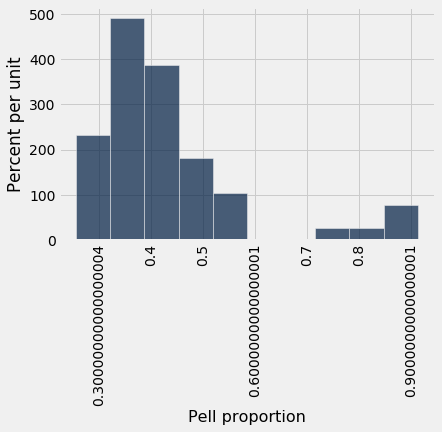

In [6]:
pell_proportions.drop(0).hist()

The file `us.json` contains data about the boundaries of each US state.  We have loaded it as a map by calling `Map.read_geojson`.

*Note:* The data come from [NOAA](http://www.nws.noaa.gov/geodata/catalog/national/html/us_state.htm).  We converted them to this format using a tool called `ogr2ogr` (see [here](http://ben.balter.com/2013/06/26/how-to-convert-shapefiles-to-geojson-for-use-on-github/)) and used [mapshaper](http://www.mapshaper.org) to reduce the resolution to 1% of the original.


The Map method `color` colors regions in a map according to numbers you specify.  It takes 2 arguments:

1. A table whose first column names each region, and whose second column gives the intensity of the color you want for that region.
2. The named argument `key_on=...`, where the argument itself is a string that tells `color` how you're identifying each region.  In this case, both `pell_proportions` and the map know about each state's abbreviation, so use `key_on="feature.properties.STATE"`.  (This part looks a little bit magical, which is just a flaw in the design of the `datascience` library.  If it confuses you, don't worry too much.)

<div class="hide">\pagebreak</div>

#### Question 5
Create a map of the US, with each state colored according to the proportion of undergraduates in that state who are Pell grant recipients, with higher-proportion states getting higher-intensity colors.

In [10]:
us_map = Map.read_geojson('us.json')
us_map.color(pell_proportions, key_on = 'feature.properties.STATE')

<div class="hide">\pagebreak</div>

#### Question 6
Describe any pattern you see in the data.  Be sure to mention any parts of the data that *don't* fit the pattern you describe.

# ====================== Ans =================
From the map above, it seems that the states with relatively greater proportion of undergraduates who are recipient of Pell grant recipients are located in the southern part of the U.S.. This can be observed by the darker color density of the southern states.
# ===========================================

## 3. Testing Dice


Students in a Data Science class want to figure out whether a six-sided die is fair or not. On a fair die, each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.  Otherwise, a die is called unfair.  We can describe a die by the probability of landing on each face.  For example, this table describes a die that is unfairly weighted toward 1:

|Face|Probability|
|--| -- |
|1|.5|
|2|.1|
|3|.1|
|4|.1|
|5|.1|
|6|.1|

For this exercise, you can use the function `proportion_from_distribution` defined in lecture and the textbook.  We've defined it in the setup cell above.

<div class="hide">\pagebreak</div>

#### Question 1
Define a null hypothesis and an alternative hypothesis for this question.

# ====================== Ans =================
**Null hypothesis:** The die is fair. 

**Alternative hypothesis:** The die is not fair. Something else is in effect.
# ===========================================

We decide to test the die by rolling it 5 times. The proportions of the 6 faces in these 5 rolls are stored in a table with 6 rows.  For example, here is the table we'd make if the die rolls ended up being 1, 2, 3, 3, and 5:

|Face|Proportion|
|--| -- |
|1|.2|
|2|.2|
|3|.4|
|4|.0|
|5|.2|
|6|.0|

The function `mystery_test_statistic`, defined below, takes a single table like this as its argument and returns a number (which we will use as a test statistic).

In [2]:
# Note: We've intentionally used obscurantist function and
# variable names to avoid giving away answers.  It's rarely
# a good idea to use names like "x" in your code.

def mystery_test_statistic(sample):
    x = sum(sample.column("Face")*sample.column("Proportion"))
    y = np.mean(np.arange(1, 6+1, 1))
    return abs(x - y)

<div class="hide">\pagebreak</div>

#### Question 2
Describe in English what the test statistic is.  Is it equivalent to the total variation distance between the observed face distribution and the fair die distribution?

# ====================== Ans =================
# `x` Calculation
Since the die was rolled 5 times, imagine the calculation was as the following:

$$ 1 \times \frac{1}{5} + 2 \times \frac{1}{5} + 3 \times \frac{2}{5} + 5 \times \frac{1}{5} $$

Above is the same as calculating the average with the following:

$$ \frac{1 + 2 + 3 + 3 + 5}{5} = \frac{\text{sum of score}}{\text{# of rolls}} $$

Thus, `x` is **the observed average of the die roll.**

# `y` Calculation
The calculation follows the theoretical probability of **average of a fair die**: If we roll the die 6 times, we should obtain each face once. The code calculates `y` by the following:

$$ \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = \frac{\text{sum of score}}{\text{# of rolls}} $$

The calculation above is the same as if we think that the probability of obtaining each face is `1/6`.

$$ 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} $$

Thus, `y` is the **theoretical average value for rolling a fair die.**

# test statistic
The function `mystery_test_statistic` calculates absolue difference between `x` and `y` and thus, the test statistic is **the absolute difference between the observed average of the die roll and the theoretical average value of a fair die**. It is **NOT** the TVD between the observed face distribution and the fair die distribution.
# ===========================================

The function `simulate_observations_and_test` takes as its argument a table describing the probability distribution of a die.  It simulates one set of 5 rolls of that die, then tests the null hypothesis about that die using our test statistic function above.  It returns `False` if it *rejects* the null hypothesis about the die, and `True` otherwise.

In [18]:
# The probability distribution table for a fair die:
fair_die = Table().with_columns(
        "Face", np.arange(1, 6+1),
        "Probability", [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def simulate_observations_and_test(actual_die):
    """Simulates die rolls from actual_die and tests the hypothesis that the die is fair.
    
    Returns True if that hypothesis is accepted, and False otherwise."""
    sample_size = 5
    p_value_cutoff = .2 #Cutoff is 20%
    num_simulations = 250
    
    #observation_set is the observed probability obtained from rolling the die 5 times
    observation_set = proportions_from_distribution(actual_die, "Probability", sample_size)
    # Calculates the test statistic of the observation set
    actual_statistic = mystery_test_statistic(observation_set.relabeled("Random Sample", "Proportion"))
    
    simulated_statistics = make_array() # An array that stores the test statistics under null hypothesis
    for _ in np.arange(num_simulations):
        # below is the observed probability obtained from rolling a FAIR die 5 times
        one_observation_set_under_null = proportions_from_distribution(fair_die, "Probability", sample_size)
        # calculate 1 test statistic obtained from the observed probability above
        simulated_statistic = mystery_test_statistic(one_observation_set_under_null.relabeled("Random Sample", "Proportion"))
        # Add the test statistic calculated above to the array 'simulated_statistics'
        simulated_statistics = np.append(simulated_statistics, simulated_statistic)
    # Calculate p-value by counting how many simulated test statistics that are greater than the observed test statistic,
    # divided by the number of simulations
    p_value = np.count_nonzero(actual_statistic < simulated_statistics) / num_simulations
    
    return p_value >= p_value_cutoff

# Calling the function to simulate a test of a fair die:
simulate_observations_and_test(fair_die)

True

<div class="hide">\pagebreak</div>

#### Question 3
By examining `simulate_observations_and_test`, compute the probability that it returns `False` when its argument is `fair_die` (which is defined above the function).  You can call the function a few times to see what it does, but **don't** perform a simulation to compute this probability.  Use your knowledge of hypothesis tests.

# ============= Part of the Answer ============
From the above code, notice that the `True` or `False` depends on whether the obtained `p-value` is greater than the cut-off. 

Recall definition of `p-value`:
<div class="alert alert-block alert-info">
    <b>P-value: </b> The probability under the <b>null</b> hypothesis that the <b>test statistic </b>is equal or to the observed data or even further to the direction of the alternative.
</div>

Using a fair die means testing the `null` under `null` hypothesis, which means the chance that the `test statistic` is equal to the observed data or further is simply the `p-value cutoff`, `0.2`.

In [16]:
probability_of_false = 0.2

<div class="hide">\pagebreak</div>

#### Question 4
From the perspective of someone who wants to know the truth about the die, is it good or bad for the function to return `False` when its argument is `fair_die`?

# ====================== Ans =================
**Bad**

This means the test gave us an incorrect conclusion: the die might not be fair and something else is in effect. While in actuality, the die is fair.
# ===========================================

<div class="hide">\pagebreak</div>

#### Question 5
Verify your answer to question 3 by simulation, computing an approximate probability that `simulation_observations_and_test` returns `False`.

**Note:** This will be a little slow.  300 repetitions of the simulation should suffice to get an answer that's roughly correct and should require a minute or so of computation.

In [30]:
num_test_simulations = 300

# For reference, the staff solution involved 6 lines of code before this.
true_or_false = []
for i in np.arange(num_test_simulations):
    true_or_false.append(simulate_observations_and_test(fair_die))

# np.count_nonzero(true_or_false) returns the number of True. If we divide this with the number of simulations,
# we can obtain the proportion of Trues. The proportion of False is simply (1 - that)
approximate_probability_of_false = 1 - (np.count_nonzero(true_or_false)/ num_test_simulations)
approximate_probability_of_false

0.24

<div class="hide">\pagebreak</div>

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")